In [1]:
import pandas as pd
import numpy as np
from kiwipiepy import Kiwi
kiwi = Kiwi(model_type='sbg')
from tqdm.auto import tqdm
tqdm.pandas()
import multiprocessing as mp
from functools import partial
from collections import Counter
import re
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from gensim.models import Phrases
from gensim.models.phrases import Phraser

# 나눔고딕 폰트 경로 설정 (시스템에 따라 경로가 다를 수 있습니다)
# font_path = r'C:\Windows\Fonts\NanumGothic.ttf'  # Windows 기준
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # Linux 기준
# font_path = '/Library/Fonts/NanumGothic.ttf'  # macOS 기준

# 폰트 프로퍼티 설정
font_prop = fm.FontProperties(fname=font_path, size=12)

# 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지


In [23]:
df = pd.read_excel('./Webtoon_kci.xlsx')
df

,논문명,논문 ID,저자명,주저자 소속기관,학술지 ID,학술지명,저자키워드,초록,발행기관 ID,발행기관명,발행연도,대분류,중분류,종분류,URL,KCI 등재 구분,고유 학술지명
0,디지털 컨텐츠 산업과 디지털 만화에 관한 연구,ART001039099,고은나,부천대학,SER000000642,일러스트레이션 포럼,NaN,디지털 기술의 발전은 사회문화 전반에 큰 파장을 일으키며 디지털 컨텐츠 산업을 빠른...,INS000000241,한국일러스트레이션학회,2006,예술체육학,디자인,디자인,https://www.kci.go.kr/kciportal/ci/sereArticle...,등재후보,한국일러스트레이션학회 - 일러스트레이션 포럼
1,웹 만화 <위대한 캣츠비>의 스토리텔링 구조 분석,ART001061496,이상민,가톨릭대학교,1717,대중서사연구,"위대한 캣츠비, 웹 만화, 스토리텔링, 웹 미디어의 특징, 서사적 층위","웹 만화 위대한 캣츠비는 웹의 매체를 이용한 서정성 획득, 3중 구조에 따른 서사적...",INS000000103,대중서사학회,2007,복합학,학제간연구,학제간연구,https://www.kci.go.kr/kciportal/ci/sereArticle...,등재후보,대중서사학회 - 대중서사연구
2,DRM 기술을 활용한 디지털 만화 콘텐츠 서비스 시나리오 개발,ART001203561,오상훈;조현주;강지훈,한국디지털콘텐츠포럼,D00564,정보처리학회논문지D,"DRM, 만화 콘텐츠, 유통 모델, 시나리오",현재 디지털 만화 컨텐츠의 온라인상에서의 유통은 불법유통 및 저작권 보호체계의 미비...,INS000000930,한국정보처리학회,2003,공학,0미분류0,공학,https://www.kci.go.kr/kciportal/ci/sereArticle...,등재,한국정보처리학회 - 정보처리학회논문지D
3,디지털 만화 콘텐츠 메타데이터 요소개발 및 적용,ART001203563,오상훈;조현주;이용배;강지훈;맹성현,명지대학교,D00564,정보처리학회논문지D,"메타데이터요소(Metadata Element), 디지털콘텐츠 유통기술(DRM), 디...","디지털콘텐츠 서비스 유형이 다양해지면서 콘텐츠 유통에 참여하는 주체들(저작자, 가공...",INS000000930,한국정보처리학회,2004,공학,0미분류0,공학,https://www.kci.go.kr/kciportal/ci/sereArticle...,등재,한국정보처리학회 - 정보처리학회논문지D
4,한국의 만화산업 발전 정책에 관한 연구,ART001221834,김병수;윤기헌,조선대학교,1980,만화애니메이션연구,"만화, 만화산업, 만화정책",우리나라 만화계가 장기침체에 빠져있다는 것은 1990년대 후반부터 누적되어 온 일반...,INS000002241,한국만화애니메이션학회,2007,예술체육학,예술일반,예술일반,https://www.kci.go.kr/kciportal/ci/sereArticle...,등재후보,한국만화애니메이션학회 - 만화애니메이션연구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,사설시조를 활용한 <시조웹툰> 스토리텔링 전략 방안 연구,ART003042167,김지은,중앙대학교,SER000001538,다문화콘텐츠연구,"사설시조, 시조웹툰, 스낵컬처, 웹툰, 시조카툰",디지털 시대로의 격변 속에서도 아직도 우리의 고전시가는 어두운 장막속에 가려진 채 ...,INS000005015,문화콘텐츠기술연구원,2023,사회과학,사회과학일반,기타사회과학일반,https://www.kci.go.kr/kciportal/ci/sereArticle...,등재,문화콘텐츠기술연구원 - 다문화콘텐츠연구
666,웹툰과 러시아 문예이론 – 러시아 형식주의를 중심으로 -,ART003044492,홍상우,경상국립대학교,1693,세계문학비교연구,"러시아 형식주의, 웹툰, 낯설게 하기, 시청각 언어, 말풍선",본고는 국내에서 발표된 웹툰 작품을 러시아 형식주의 이론의 주요 개념으로 분석하려는...,INS000001882,세계문학비교학회,2023,인문학,문학,문학,https://www.kci.go.kr/kciportal/ci/sereArticle...,등재,세계문학비교학회 - 세계문학비교연구
667,웹툰 기반 OSMU 영상 콘텐츠의 만듦새에 관한 이용자들의 인식 연구: OSMU 태...,ART003044501,홍세민;이상우,연세대학교 정보대학원,SER000005593,비즈니스융복합연구,"웹툰, OSMU 만듦새, 브랜드 확장, OSMU 태도, 웹툰 만족도","웹툰의 지속적인 성장과 함께, 웹툰 기반 OSMU 드라마, 영화 제작이 활성화되는 ...",INS000062611,한국비즈니스학회,2023,복합학,과학기술학,과학기술학,https://www.kci.go.kr/kciportal/ci/sereArticle...,등재,한국비즈니스학회 - 비즈니스융복합연구
668,만화 작가 화풍을 바탕으로 한 생성 AI의 구독제 서비스 탐구,ART003045213,장순규;권민지;여지민;이한나;최은우,계명대학교,SER000006249,미래문화,"생성 AI, 구독제, 서비스 디자인, UX 디자인","최근, 생성 AI는 인간의 작품과 차이가 없을 높은 완성도의 이미지를 생성하고 있다...",INS000008744,한국미래문화연구소,2023,인문학,기타인문학,기타인문학,https://www.kci.go.kr/kciportal/ci/sereArticle...,등재후보,한국미래문화연구소 - 미래문화


In [24]:
df.columns

Index(['논문명', '논문 ID', '저자명', '주저자 소속기관', '학술지 ID', '학술지명', '저자키워드', '초록',
       '발행기관 ID', '발행기관명', '발행연도', '대분류', '중분류', '종분류', 'URL', 'KCI 등재 구분',
       '고유 학술지명'],
      dtype='object')

In [25]:
kiwi.add_user_word('웹툰', 'NNG')
kiwi.add_user_word('M&A', 'NNG')
kiwi.add_user_word('신과함께', 'NNP')
kiwi.add_user_word('신과 함께', 'NNP')

False

In [26]:
def tokenize_part(sent):
    tokens = kiwi.tokenize(sent)
    return [token.form
            for token in tokens
            if token.tag in ['NNG', 'NNP', 'SL']]  # NNG, NNP, SL 태그를 가진 토큰만 추출

In [27]:
tokenize_part('웹툰과 M&A 그리고 신과함께 혹은 신과 함께')

['웹툰', 'M&A', '신과함께', '신과 함께']

In [28]:
# 영어, 숫자, 일반 구두점만 포함하는지 확인하는 함수
def is_english_only(text):
    if pd.isna(text):  # NaN 값 처리
        return False
    # 영어 문자, 숫자, 일반적인 구두점만 포함하는지 확인
    return bool(re.match(r'^[a-zA-Z0-9\s\.,;:!?"\'()\-]+$', str(text)))

# '초록' 열에서 영어로만 작성된 행 찾기
english_only_rows = df[df['초록'].apply(is_english_only)]

# 결과 출력
print(f"영어로만 작성된 초록의 수: {len(english_only_rows)}")

# 처음 5개 행 출력
print("\n처음 5개 영어로만 작성된 초록:")
print(english_only_rows['초록'].head())

영어로만 작성된 초록의 수: 21

처음 5개 영어로만 작성된 초록:
15     Purpose of this treatise is that typify irony ...
86     As Hallyu, or the Korean Wave as it is known a...
117    The rapid influx of new digital media technolo...
123    According as popularity of Korean webtoon rise...
182    This paper explores how non-verbal texts in we...
Name: 초록, dtype: object


In [29]:
# 한국어 초록 없는 경우 제외
df = df[~df['초록'].apply(is_english_only)]

In [30]:
# 키워드 컴마 제거
df['저자키워드'] = df['저자키워드'].str.replace(',','')

/tmp/ipykernel_2875606/667290204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['저자키워드'] = df['저자키워드'].str.replace(',','')


In [31]:
df['저자키워드']

0                                                    NaN
1                    위대한 캣츠비 웹 만화 스토리텔링 웹 미디어의 특징 서사적 층위
2                                  DRM 만화 콘텐츠 유통 모델 시나리오
3      메타데이터요소(Metadata Element) 디지털콘텐츠 유통기술(DRM) 디지털...
4                                           만화 만화산업 만화정책
                             ...                        
665                               사설시조 시조웹툰 스낵컬처 웹툰 시조카툰
666                        러시아 형식주의 웹툰 낯설게 하기 시청각 언어 말풍선
667                    웹툰 OSMU 만듦새 브랜드 확장 OSMU 태도 웹툰 만족도
668                             생성 AI 구독제 서비스 디자인 UX 디자인
669                            마법소녀 여성영웅 변신 모친 살해 모티프 여장
Name: 저자키워드, Length: 649, dtype: object

In [32]:
# 제목 + 키워드 + 초록
# NA 값을 공백으로 대체하는 함수
def replace_na_with_blank(x):
    return '' if pd.isna(x) else x

# 데이터프레임에 이 함수를 적용하고 컬럼들을 합칩니다
df['combined_text'] = (
    df['논문명'].apply(replace_na_with_blank) + ' ' +
    df['저자키워드'].apply(replace_na_with_blank) + ' ' +
    df['초록'].apply(replace_na_with_blank)
)

# 결과 확인
print(df['combined_text'].head())

0    디지털 컨텐츠 산업과 디지털 만화에 관한 연구  디지털 기술의 발전은 사회문화 전반...
1    웹 만화 <위대한 캣츠비>의 스토리텔링 구조 분석 위대한 캣츠비 웹 만화 스토리텔링...
2    DRM 기술을 활용한 디지털 만화 콘텐츠 서비스 시나리오 개발 DRM 만화 콘텐츠 ...
3    디지털 만화 콘텐츠 메타데이터 요소개발 및 적용 메타데이터요소(Metadata El...
4    한국의 만화산업 발전 정책에 관한 연구 만화 만화산업 만화정책 우리나라 만화계가 장...
Name: combined_text, dtype: object


/tmp/ipykernel_2875606/3773274621.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['combined_text'] = (


In [33]:
df['combined_text'][1]

'웹 만화 <위대한 캣츠비>의 스토리텔링 구조 분석 위대한 캣츠비 웹 만화 스토리텔링 웹 미디어의 특징 서사적 층위 웹 만화 위대한 캣츠비는 웹의 매체를 이용한 서정성 획득, 3중 구조에 따른 서사적 층위, 등장인물들의 내적 성장 이야기의 특성을 통해 스토리텔링을 구현하고 있다. 이러한 스토리텔링은 대중들의 감수성을 자극하여 흥행에 성공할 수 있게 하였고, 웹 만화의 위상을 확립하는 데 결정적인 역할을 했다.위대한 캣츠비의 두루마리 형식의 읽기는 웹 특성을 적극 활용하여 연속성이 강한 이미지를 나열함으로써 끊김없이 읽어내려가는 속도감을 느낄 수 있게 하였다. 그리고 칸을 의도적으로 배제하고 배열함으로써 여백을 통한 감성을 창조해 냈으며, 천연색을 사용하여 영상성을 표출함으로써 서사적이면서도 서정성을 극대화할 수 있는 방법을 터득했다.위대한 캣츠비에 등장하는 세 개의 보조 플롯은 단조로울 수 있었던 멜로 이야기를 좀 더 복잡하게 얽히게 함으로써 사랑에 대한 중심 플롯을 다양하게 변주시키면서 이야기에 풍성함을 더해주었다. 여기에 현실적 층위, 위선적 층위, 몽환적ㆍ환치적 층위의 3중 서사적 층위가 유기적으로 결합하면서 극적 긴장감을 작품의 끝까지 팽팽하게 유지시켜 주는 효과를 나타냈다.또한 등장인물들이 바라봄과 보여짐의 과정을 통해 타인과 관계를 맺는 데 한층 성숙해지는 성장의 과정을 담아내어 사랑에 대한 인간의 내적 욕망을 보여줌으로써 젊은 독자들의 감수성을 울리는 스토리텔링을 성공적으로 확립시켰다.주제어위대한 캣츠비, 웹 만화, 스토리텔링, 웹 미디어의 특징, 서사적 층위'

In [34]:
# df['combined_text'].progress_map(lambda x:tokenize_part(x))

  0%|          | 0/670 [00:00<?, ?it/s]

0      [디지털, 컨텐츠, 산업, 디지털, 만화, 연구, 디지털, 기술, 발전, 사회, 문...
1      [웹, 만화, 캣츠, 스토리텔링, 구조, 분석, 캣츠, 웹, 만화, 스토리텔링, 웹...
2      [DRM, 기술, 활용, 디지털, 만화, 콘텐츠, 서비스, 시나리오, 개발, DRM...
3      [디지털, 만화, 콘텐츠, 메타, 데이터, 요소, 개발, 적용, 메타, 데이터, 요...
4      [한국, 만화, 산업, 발전, 정책, 연구, 만화, 만화, 산업, 만화, 정책, 나...
                             ...                        
665    [사설시조, 활용, 시조, 웹툰, 스토리텔링, 전략, 방안, 연구, 사설시조, 시조...
666    [웹툰, 러시아, 문예, 이론, 러시아, 형식주의, 중심, 러시아, 형식주의, 웹툰...
667    [웹툰, 기반, OSMU, 영상, 콘텐츠, 만듦새, 이용, 인식, 연구, OSMU,...
668    [만화, 작가, 화풍, 바탕, 생성, AI, 구독, 서비스, 탐구, 생성, AI, ...
669    [아메리카노, 엑소더스, 속, 마법소녀, 고찰, 변신, 모티프, 수용, 양상, 모바...
Name: combined_text, Length: 670, dtype: object

In [74]:
def process_chunk(texts):
    return [tokenize_part(text) for text in texts]

def parallel_tokenize(series, num_processes=None):
    if num_processes is None:
        num_processes = mp.cpu_count()  # 사용 가능한 CPU 코어 수를 사용

    # Series를 리스트로 변환
    texts = series.tolist()

    # 데이터를 균등하게 분할
    chunk_size = len(texts) // num_processes
    chunks = [texts[i:i + chunk_size] for i in range(0, len(texts), chunk_size)]

    # tqdm을 사용하여 진행 상황을 표시하면서 멀티프로세싱 풀 생성 및 작업 실행
    with mp.Pool(processes=num_processes) as pool:
        results = list(tqdm(
            pool.imap(process_chunk, chunks),
            total=len(chunks),
            desc="Processing chunks"
        ))

    # 결과 합치기
    return [item for sublist in results for item in sublist]
# 전체 처리 과정에 대한 tqdm 진행 바 추가
with tqdm(total=100, desc="Overall progress", position=0) as pbar:
    # 병렬 처리 실행
    df['tokens'] = parallel_tokenize(df['combined_text'])
    pbar.update(100)

Overall progress:   0%|          | 0/100 [00:00<?, ?it/s]

Processing chunks:   0%|          | 0/65 [00:00<?, ?it/s]

/tmp/ipykernel_2875606/2320503483.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = parallel_tokenize(df['combined_text'])


In [ ]:
# # '툰'이 독립적인 토큰으로 포함된 행을 찾는 함수
# def contains_toon_token(tokens):
#     return '툰' in tokens

# # '툰'이 독립적인 토큰으로 포함된 행 필터링
# toon_rows = df[df['tokens'].apply(contains_toon_token)]

# # 결과 출력
# print(f"'툰'이 독립적인 토큰으로 포함된 행의 수: {len(toon_rows)}")
# print("\n처음 5개 행:")
# print(toon_rows.head())

# # '툰' 토큰의 인덱스와 주변 토큰 확인
# def get_toon_context(tokens, window=2):
#     contexts = []
#     for i, token in enumerate(tokens):
#         if token == '툰':
#             start = max(0, i - window)
#             end = min(len(tokens), i + window + 1)
#             context = tokens[start:end]
#             contexts.append((i, context))
#     return contexts

# toon_rows['toon_contexts'] = toon_rows['tokens'].apply(get_toon_context)

# # 결과 출력
# print("\n'툰' 토큰의 컨텍스트 (앞뒤 2개 토큰):")
# for index, row in toon_rows.head().iterrows():
#     print(f"\n원본 텍스트의 인덱스: {index}")
#     for toon_index, context in row['toon_contexts']:
#         print(f"  '툰' 토큰 인덱스: {toon_index}, 컨텍스트: {context}")

# # '툰' 주변 토큰 빈도 분석
# from collections import Counter

# before_toon = Counter()
# after_toon = Counter()

# for contexts in toon_rows['toon_contexts']:
#     for _, context in contexts:
#         toon_index = context.index('툰')
#         if toon_index > 0:
#             before_toon[context[toon_index - 1]] += 1
#         if toon_index < len(context) - 1:
#             after_toon[context[toon_index + 1]] += 1

# print("\n'툰' 앞에 가장 자주 나타나는 토큰:")
# print(before_toon.most_common(5))

# print("\n'툰' 뒤에 가장 자주 나타나는 토큰:")
# print(after_toon.most_common(5))

In [75]:
def replace_consecutive(tokens):
    new_tokens = []
    for token in tokens:
        if len(new_tokens) > 0 and new_tokens[-1] == '신과' and token == '함께':
            new_tokens[-1] = '신과함께'
        else:
            new_tokens.append(token)
    return new_tokens

df['tokens'] = df['tokens'].apply(replace_consecutive)

/tmp/ipykernel_2875606/850196577.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['tokens'].apply(replace_consecutive)


In [76]:
def unify_tokens(tokens):
    return [token.replace('신과 함께', '신과함께') for token in tokens]

df['tokens'] = df['tokens'].apply(unify_tokens)

/tmp/ipykernel_2875606/2839061492.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['tokens'].apply(unify_tokens)


In [77]:
df['tokens'].map(lambda x: '신과함께' in x).sum()

35

총 Bigram 수: 10
트랜스_미디어: 127
상호_작용: 103
가상_현실: 47
청년_세대: 39
인공_지능: 34
구매_의도: 33
비즈니스_모델: 31
코_믹스: 30
종이_책: 23
계룡_선녀: 23


/tmp/ipykernel_2875606/3381342036.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bigrams'] = df['tokens'].apply(apply_bigrams)


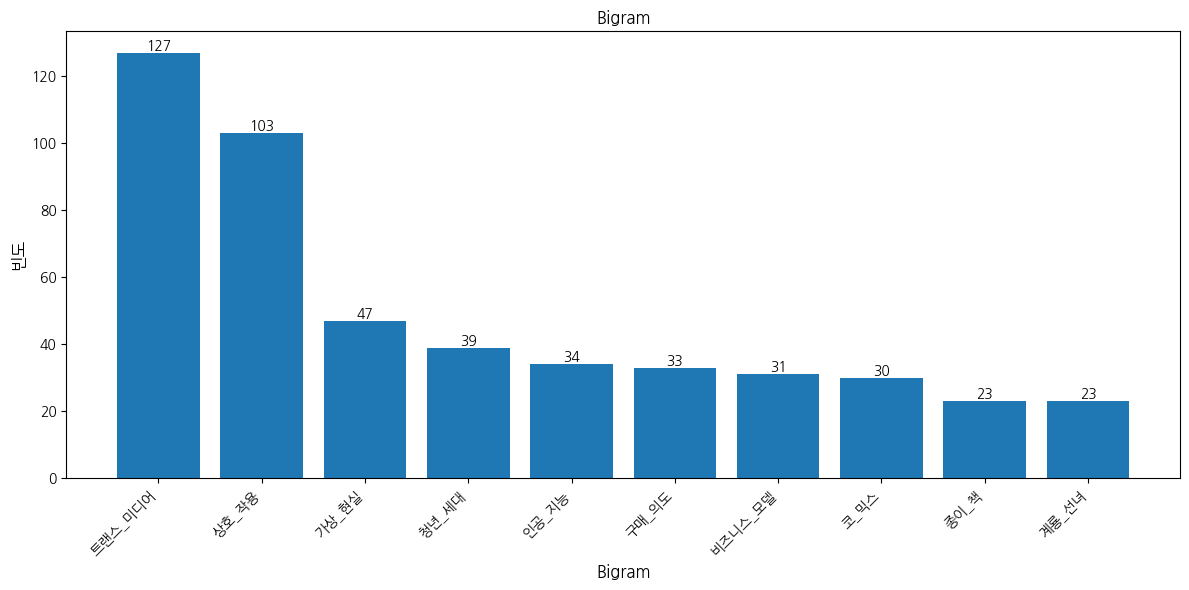

In [78]:
# gensim Phrases 모델 생성
bigram = Phrases(df['tokens'], min_count=20, threshold=100)  # min_count와 threshold를 조정하여 결과를 조절할 수 있습니다
bigram_model = Phraser(bigram)

# 바이그램 적용 함수
def apply_bigrams(tokens):
    return bigram_model[tokens]

# 각 행에 바이그램 적용
df['bigrams'] = df['tokens'].apply(apply_bigrams)

# 모든 바이그램 추출 및 빈도 계산
all_bigrams = [token for tokens in df['bigrams'] for token in tokens if '_' in token]
bigram_counts = Counter(all_bigrams)

# 결과 출력
print(f"총 Bigram 수: {len(bigram_counts)}")
# print("\n상위 20개 Bigram:")
for bigram, count in bigram_counts.most_common():
    print(f"{bigram}: {count}")

# 상위 15개 bigram 시각화
top_15 = dict(bigram_counts.most_common(20))

plt.figure(figsize=(12, 6))
bars = plt.bar(top_15.keys(), top_15.values())
plt.title("Bigram", fontproperties=font_prop)
plt.xlabel('Bigram', fontproperties=font_prop)
plt.ylabel('빈도', fontproperties=font_prop)
plt.xticks(rotation=45, ha='right')

# 막대 위에 빈도 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# # 옵션: 특정 단어를 포함하는 bigram 찾기
# def find_bigrams_with_word(word, bigram_counts, top_n=10):
#     related_bigrams = {bigram: count for bigram, count in bigram_counts.items() if word in bigram.split('_')}
#     return Counter(related_bigrams).most_common(top_n)

# # 예시: '웹'을 포함하는 bigram 찾기
# word_to_find = '툰'
# print(f"\n'{word_to_find}'를 포함하는 상위 10개 Bigram:")
# for bigram, count in find_bigrams_with_word(word_to_find, bigram_counts):
#     print(f"{bigram}: {count}")

총 Bigram 수: 10
트랜스_미디어: 127
상호_작용: 103
가상_현실: 47
청년_세대: 39
인공_지능: 34
구매_의도: 33
비즈니스_모델: 31
코_믹스: 30
종이_책: 23
계룡_선녀: 23


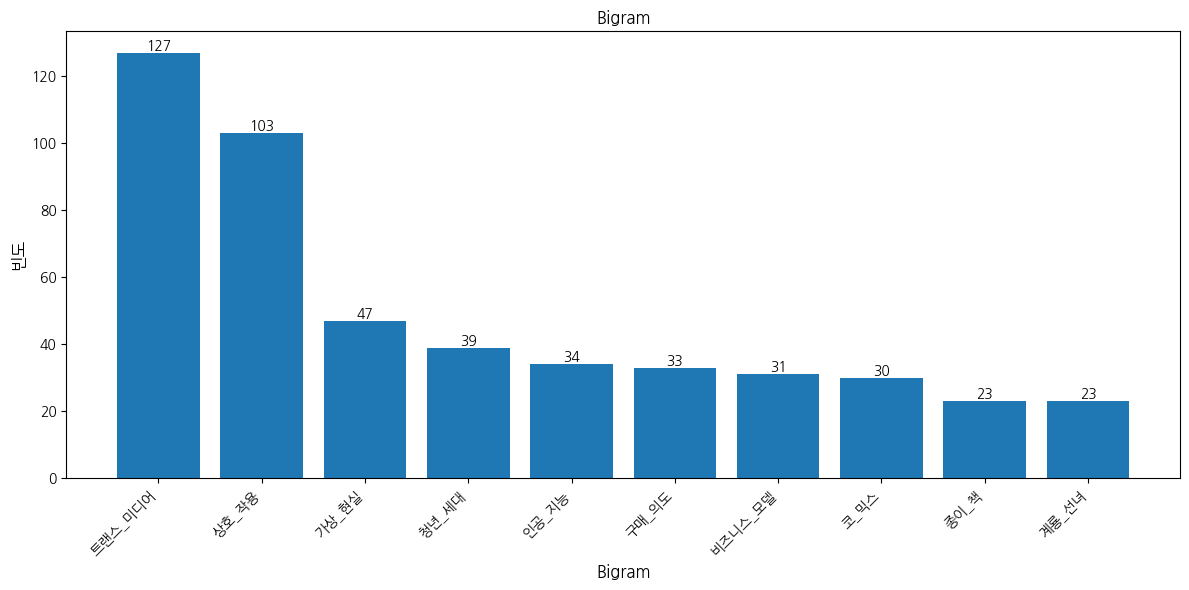

In [53]:
# 모든 바이그램 추출 및 빈도 계산
all_bigrams = [token for tokens in df['bigrams'] for token in tokens if '_' in token]
bigram_counts = Counter(all_bigrams)

# 결과 출력
print(f"총 Bigram 수: {len(bigram_counts)}")
# print("\n상위 20개 Bigram:")
for bigram, count in bigram_counts.most_common():
    print(f"{bigram}: {count}")

# 상위 15개 bigram 시각화
top_15 = dict(bigram_counts.most_common(30))

plt.figure(figsize=(12, 6))
bars = plt.bar(top_15.keys(), top_15.values())
plt.title("Bigram", fontproperties=font_prop)
plt.xlabel('Bigram', fontproperties=font_prop)
plt.ylabel('빈도', fontproperties=font_prop)
plt.xticks(rotation=45, ha='right')

# 막대 위에 빈도 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

   Word  Frequency
0     웹        336
1     점        282
2     속        170
3     a        161
4     칸        139
5     삶        118
6     때        106
7     성         97
8     글         94
9     시         89
10    K         81
11    후         67
12    일         65
13    극         62
14    전         62
15    신         62
16    D         60
17    장         56
18    말         52
19    인         51
20    안         51
21    법         50
22    s         49
23    물         48
24    앞         44
25    딸         41
26    도         40
27    수         40
28    툰         39
29    지         38
30    책         36
31    비         36
32    원         35
33    사         34
34    문         34
35    면         33
36    A         33
37    컷         32
38    예         32
39    주         31
40    위         30
41    팬         30
42    힘         27
43    용         27
44    정         27
45    상         26
46    화         26
47    양         25
48    질         25
49    체         25


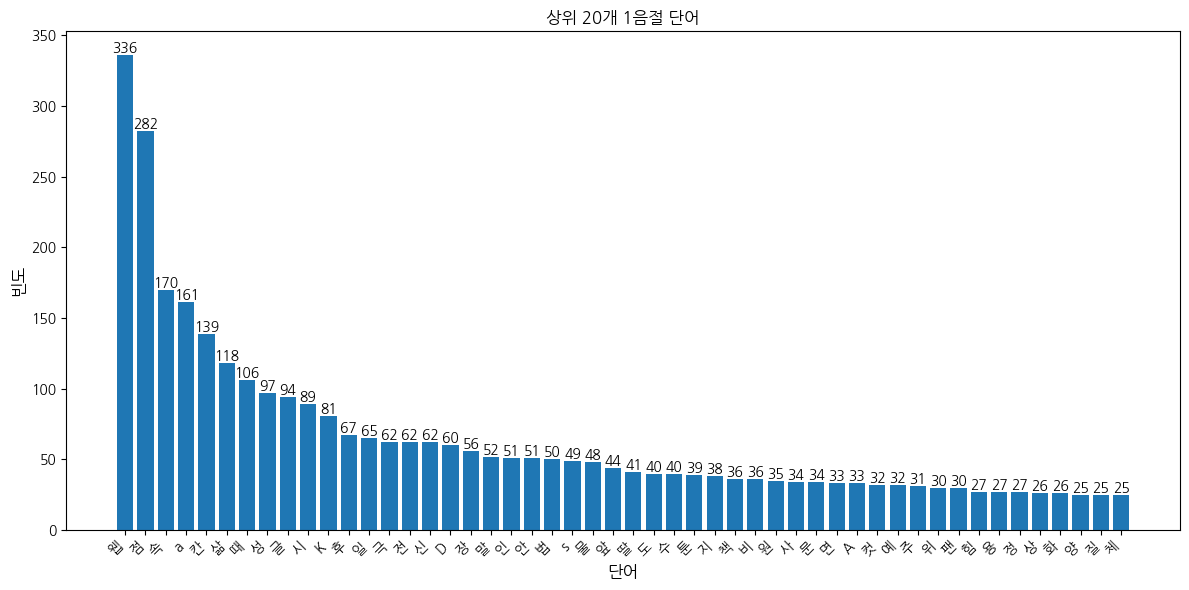

In [81]:
# 1음절 단어 추출 및 빈도 계산 함수
def get_single_syllable_words(tokens_series):
    all_tokens = [token for tokens in tokens_series for token in tokens]
    single_syllable_words = [word for word in all_tokens if len(word) == 1]
    word_counts = Counter(single_syllable_words)
    top_20 = word_counts.most_common(50)
    return top_20

# 실행
top_20_single_syllable = get_single_syllable_words(df['bigrams'])

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(top_20_single_syllable, columns=['Word', 'Frequency'])

# 결과 출력
print(result_df)

# 막대 그래프로 시각화
plt.figure(figsize=(12, 6))
bars = plt.bar(result_df['Word'], result_df['Frequency'])
plt.title('상위 20개 1음절 단어', fontproperties=font_prop)
plt.xlabel('단어', fontproperties=font_prop)
plt.ylabel('빈도', fontproperties=font_prop)
plt.xticks(rotation=45, ha='right')

# 막대 위에 빈도 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 웹, 툰, 삶, 책, 말, 법, 힘, 팬, 컷, 딸, 극, 속, 글, 칸, 신

In [82]:
# 보존할 1음절 단어 리스트
keep_words = ['웹', '툰', '삶', '책', '말', '법', '힘', '팬', '컷', '극', '속', '글', '칸', '신', 'K','면','용']

# 토큰 필터링 함수
def filter_tokens(tokens):
    if isinstance(tokens, pd.Series):
        tokens = tokens.tolist()
    
    return [token for token in tokens if len(token) > 1 or token in keep_words]

# 'bigrams' 컬럼에 필터링 적용 (실제로는 토큰 리스트임)
df['filtered_tokens'] = df['bigrams'].apply(filter_tokens)

# 결과 확인
print("필터링 전 토큰 수의 평균:", df['bigrams'].apply(lambda x: len(x) if isinstance(x, list) else len(x.tolist())).mean())
print("필터링 후 토큰 수의 평균:", df['filtered_tokens'].apply(len).mean())

# 제거된 토큰 예시 (처음 5개 행)
print("\n제거된 토큰 예시 (처음 5개 행):")
for i in range(5):
    original = df['bigrams'].iloc[i]
    if isinstance(original, pd.Series):
        original = original.tolist()
    removed = set(original) - set(df['filtered_tokens'].iloc[i])
    print(f"행 {i}: {list(removed)}")

# 전체 데이터에서 제거된 토큰 집계
from collections import Counter

all_removed_tokens = []
for original, filtered in zip(df['bigrams'], df['filtered_tokens']):
    if isinstance(original, pd.Series):
        original = original.tolist()
    removed = set(original) - set(filtered)
    all_removed_tokens.extend(removed)

removed_tokens_count = Counter(all_removed_tokens)

print("\n가장 많이 제거된 상위 20개 토큰:")
for token, count in removed_tokens_count.most_common(20):
    print(f"{token}: {count}")

# 제거된 1음절 단어 목록 (keep_words 제외)
removed_single_syllables = set(token for token in removed_tokens_count.keys() if len(token) == 1 and token not in keep_words)

print("\n제거된 1음절 단어 목록 (keep_words 제외):")
print(', '.join(sorted(removed_single_syllables)))

필터링 전 토큰 수의 평균: 158.1633281972265
필터링 후 토큰 수의 평균: 152.4191063174114

제거된 토큰 예시 (처음 5개 행):
행 0: []
행 1: ['내', '끝', '위', '중']
행 2: []
행 3: ['자']
행 4: []

가장 많이 제거된 상위 20개 토큰:
점: 179
때: 84
후: 51
안: 45
a: 42
성: 38
앞: 38
시: 36
전: 34
장: 32
도: 32
일: 31
수: 31
주: 29
물: 28
위: 27
인: 27
s: 25
질: 25
원: 24

제거된 1음절 단어 목록 (keep_words 제외):
A, B, C, D, E, G, I, J, L, M, N, O, P, R, S, T, V, W, Z, a, b, c, d, e, f, g, h, i, k, l, m, n, p, s, t, u, w, x, y, , ×, 가, 각, 간, 감, 갑, 값, 갓, 강, 개, 객, 겉, 격, 결, 겹, 경, 계, 고, 곡, 곤, 곰, 곱, 곳, 공, 과, 관, 교, 구, 국, 군, 권, 궤, 귀, 규, 근, 금, 급, 긍, 기, 길, 김, 꼴, 꿈, 끝, 나, 난, 날, 남, 낮, 낱, 내, 녀, 노, 논, 눈, 뉴, 능, 단, 달, 닭, 담, 답, 당, 대, 댁, 더, 덕, 덤, 덧, 도, 독, 돈, 동, 뒤, 드, 득, 듦, 등, 디, 딥, 딸, 땅, 때, 뜻, 라, 래, 랙, 량, 런, 레, 력, 령, 례, 롤, 롱, 료, 룩, 르, 리, 린, 림, 링, 마, 막, 만, 맛, 망, 매, 맥, 맨, 맬, 멋, 멜, 명, 모, 목, 몫, 몸, 묘, 무, 문, 물, 미, 믹, 민, 밀, 밈, 바, 박, 밖, 반, 발, 밤, 방, 배, 백, 뱀, 뱅, 버, 벌, 벽, 별, 병, 보, 본, 볼, 봉, 부, 북, 불, 붐, 뷰, 브, 비, 빅, 빔, 빵, 뿔, 사, 산, 살, 상, 새, 색, 생, 샤, 샷, 서, 석, 선, 설, 섬, 성, 세, 셀, 셋, 셔, 션, 소, 손, 쇼, 숏, 수, 순, 술,

/tmp/ipykernel_2875606/4045956001.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['filtered_tokens'] = df['bigrams'].apply(filter_tokens)


In [83]:
def filter_english_words(tokens):
    def keep_word(word):
        if re.match(r'^[a-zA-Z\&]+$', word):  # 영어 단어인 경우
            return word.isupper()  # 대문자로만 구성된 경우만 True 반환
        return True  # 영어가 아닌 경우 모두 유지

    return [token for token in tokens if keep_word(token)]

# df['filtered_tokens']의 각 행에 대해 필터링 적용
df['filtered_tokens_uppercase'] = df['filtered_tokens'].apply(filter_english_words)

# 결과 확인
print("처리 전 첫 5개 행:")
print(df['filtered_tokens'].head())
print("\n처리 후 첫 5개 행:")
print(df['filtered_tokens_uppercase'].head())

# 변경된 토큰 수 확인
token_count_before = df['filtered_tokens'].apply(len).sum()
token_count_after = df['filtered_tokens_uppercase'].apply(len).sum()
removed_tokens = token_count_before - token_count_after

print(f"\n제거된 토큰 수: {removed_tokens}")
print(f"제거 비율: {(removed_tokens/token_count_before)*100:.2f}%")

# 옵션: 제거된 영어 소문자/혼합 단어 목록 (상위 20개)
removed_words = []
for before, after in zip(df['filtered_tokens'], df['filtered_tokens_uppercase']):
    removed_words.extend(set(before) - set(after))

english_removed = [word for word in removed_words if re.match(r'^[a-zA-Z]+$', word) and not word.isupper()]
print("\n제거된 영어 소문자/혼합 단어 (상위 20개):")
print(", ".join(sorted(set(english_removed), key=english_removed.count, reverse=True)[:30]))

/tmp/ipykernel_2875606/3255280322.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['filtered_tokens_uppercase'] = df['filtered_tokens'].apply(filter_english_words)


처리 전 첫 5개 행:
0    [디지털, 컨텐츠, 산업, 디지털, 만화, 연구, 디지털, 기술, 발전, 사회, 문...
1    [웹, 만화, 캣츠, 스토리텔링, 구조, 분석, 캣츠, 웹, 만화, 스토리텔링, 웹...
2    [DRM, 기술, 활용, 디지털, 만화, 콘텐츠, 서비스, 시나리오, 개발, DRM...
3    [디지털, 만화, 콘텐츠, 메타, 데이터, 요소, 개발, 적용, 메타, 데이터, 요...
4    [한국, 만화, 산업, 발전, 정책, 연구, 만화, 만화, 산업, 만화, 정책, 나...
Name: filtered_tokens, dtype: object

처리 후 첫 5개 행:
0    [디지털, 컨텐츠, 산업, 디지털, 만화, 연구, 디지털, 기술, 발전, 사회, 문...
1    [웹, 만화, 캣츠, 스토리텔링, 구조, 분석, 캣츠, 웹, 만화, 스토리텔링, 웹...
2    [DRM, 기술, 활용, 디지털, 만화, 콘텐츠, 서비스, 시나리오, 개발, DRM...
3    [디지털, 만화, 콘텐츠, 메타, 데이터, 요소, 개발, 적용, 메타, 데이터, 요...
4    [한국, 만화, 산업, 발전, 정책, 연구, 만화, 만화, 산업, 만화, 정책, 나...
Name: filtered_tokens_uppercase, dtype: object

제거된 토큰 수: 9748
제거 비율: 9.85%

제거된 영어 소문자/혼합 단어 (상위 20개):
of, Webtoon, webtoon, the, to, and, in, The, on, is, this, that, by, for, as, This, are, study, with, be, In, an, has, through, Korean, were, from, into, it, was


In [84]:
# 영어 단어만 추출하는 함수
def is_english(word):
    return bool(re.match(r'^[a-zA-Z\&]+$', word))

# 모든 토큰을 하나의 리스트로 합치기
all_tokens = [token for tokens in df['filtered_tokens_uppercase'] for token in tokens]

# 영어 토큰만 필터링하고 빈도수 계산
english_token_counts = Counter(token for token in all_tokens if is_english(token))

# 상위 50개 영어 토큰 출력
print("상위 50개 영어 토큰과 그 빈도수:")
for token, count in english_token_counts.most_common(50):
    print(f"{token}: {count}")

# 전체 영어 토큰 수와 고유 영어 토큰 수 출력
total_english_tokens = sum(english_token_counts.values())
unique_english_tokens = len(english_token_counts)
print(f"\n전체 영어 토큰 수: {total_english_tokens}")
print(f"고유 영어 토큰 수: {unique_english_tokens}")

상위 50개 영어 토큰과 그 빈도수:
IP: 118
OSMU: 102
K: 81
SNS: 73
VR: 69
TV: 56
PPL: 45
AI: 43
PC: 27
OTT: 24
IT: 18
UX: 16
OST: 15
M&A: 15
AR: 14
UI: 11
IPA: 11
DRM: 10
DB: 8
ISBN: 8
SF: 7
PL: 7
EFL: 6
WEBTOON: 6
GL: 6
HTML: 5
SPSS: 5
IMTBPT: 5
AHP: 5
BTS: 5
STEAM: 5
PAT: 4
IMF: 4
ICT: 4
BL: 4
OCN: 4
BU: 4
POP: 4
MPEG: 3
CG: 3
CT: 3
PLS: 3
BGM: 3
DTPB: 3
MBC: 3
PPS: 3
NAVER: 3
PD: 3
MMT: 3
PSM: 3

전체 영어 토큰 수: 992
고유 영어 토큰 수: 132


상위 50개 토큰과 그 빈도수:
웹툰: 4165
연구: 1508
만화: 1297
콘텐츠: 1289
서사: 896
분석: 885
문화: 696
활용: 602
중심: 525
작품: 492
산업: 461
디지털: 449
한국: 438
매체: 409
다양: 404
스토리텔링: 404
영화: 381
플랫폼: 380
사회: 377
독자: 365
미디어: 359
결과: 358
작가: 357
과정: 350
웹: 336
특성: 331
캐릭터: 330
교육: 329
방식: 328
변화: 327
요소: 325
장르: 324
가능: 319
효과: 312
시장: 312
기술: 304
제작: 302
드라마: 301
영향: 287
구조: 274
이야기: 274
기반: 267
전략: 265
의미: 255
브랜드: 248
제시: 245
고전: 245
확장: 241
표현: 240
구성: 238

전체 토큰 수: 89172
고유 토큰 수: 6170
평균 출현 빈도: 14.45
'만화'의 빈도수: 1297
'웹툰'의 빈도수: 4165


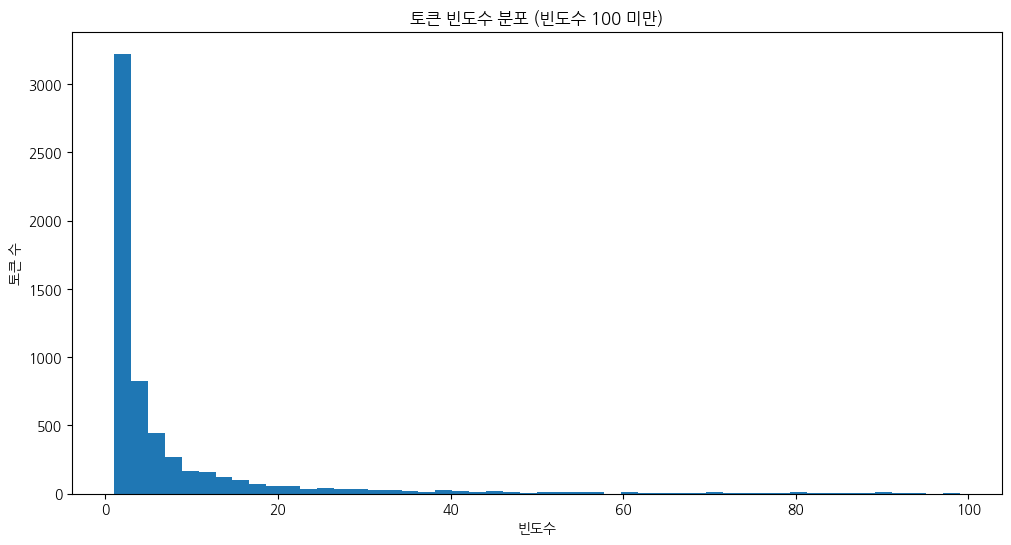

In [85]:
# 모든 토큰을 하나의 리스트로 합치기
all_tokens = [token for tokens in df['filtered_tokens_uppercase'] for token in tokens]

# 토큰 빈도수 계산
token_counts = Counter(all_tokens)

# 상위 50개 토큰 출력
print("상위 50개 토큰과 그 빈도수:")
for token, count in token_counts.most_common(50):
    print(f"{token}: {count}")

# 전체 토큰 수와 고유 토큰 수 출력
total_tokens = sum(token_counts.values())
unique_tokens = len(token_counts)
print(f"\n전체 토큰 수: {total_tokens}")
print(f"고유 토큰 수: {unique_tokens}")

# 평균 출현 빈도
average_frequency = total_tokens / unique_tokens
print(f"평균 출현 빈도: {average_frequency:.2f}")

# 옵션: 특정 단어의 빈도수 확인 함수
def check_word_frequency(word):
    frequency = token_counts.get(word, 0)
    print(f"'{word}'의 빈도수: {frequency}")

# 사용 예:
check_word_frequency("만화")
check_word_frequency("웹툰")

plt.figure(figsize=(12, 6))
plt.hist([count for count in token_counts.values() if count < 100], bins=50)
plt.title("토큰 빈도수 분포 (빈도수 100 미만)")
plt.xlabel("빈도수")
plt.ylabel("토큰 수")
plt.show()

In [86]:
df.to_pickle('./240727_WebToon_tokens.pkl')